### In this assignment I will try to find temperature anomaly all around the world 

### What is temperature anomaly?

The term `anomaly` means a departure from a reference value or long-term average. A positive anomaly indicates that the observed temperature was warmer than the reference value, while a negative anomaly indicates that the observed temperature was cooler than the reference value.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("graph.txt",delimiter='\t')
df

,Land-Ocean Temperature Index (C)
0,--------------------------------
1,Year No_Smoothing Lowess(5)
2,----------------------------
3,1880 -0.17 -0.10
4,1881 -0.09 -0.13
...,...
140,2017 0.92 0.91
141,2018 0.85 0.92
142,2019 0.98 0.93
143,2020 1.02 0.93


Making the data in usable form:

In [3]:

data = []
for i in df.to_numpy().flatten()[3:]:
    data.append(i.split())

d = [[float(j) for j in data[i]] for i in range(len(data))]

### $Smoothing \rightarrow Annual \space Mean$

### $Lowess \rightarrow Lowess \space Smoothing$

In [4]:
ndf = pd.DataFrame(d,columns=['Year','Smoothing','Lowess'])
ndf

,Year,Smoothing,Lowess
0,1880.0,-0.17,-0.10
1,1881.0,-0.09,-0.13
2,1882.0,-0.11,-0.17
3,1883.0,-0.18,-0.20
4,1884.0,-0.28,-0.24
...,...,...,...
137,2017.0,0.92,0.91
138,2018.0,0.85,0.92
139,2019.0,0.98,0.93
140,2020.0,1.02,0.93


In [5]:
ndf.index = ndf.Year.to_numpy()

In [6]:
ndf.describe()

,Year,Smoothing,Lowess
count,142.000000,142.000000,142.000000
mean,1950.500000,0.053944,0.054014
std,41.135953,0.362540,0.350972
min,1880.000000,-0.480000,-0.410000
25%,1915.250000,-0.200000,-0.227500
50%,1950.500000,-0.065000,-0.040000
75%,1985.750000,0.252500,0.235000
max,2021.000000,1.020000,0.940000


<AxesSubplot:>

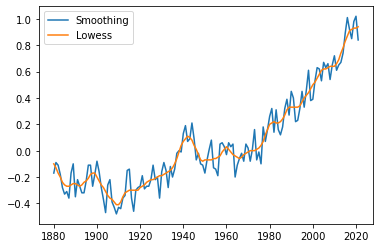

In [7]:
ndf[['Smoothing','Lowess']].plot()

`Earth’s global average surface temperature in 2020 tied with 2016 as the hottest year on record, continuing a long-term warming trend due to human activities.Earth’s global average surface temperature in 2020 tied with 2016 as the hottest year on record, continuing a long-term warming trend due to human activities.`

<AxesSubplot:>

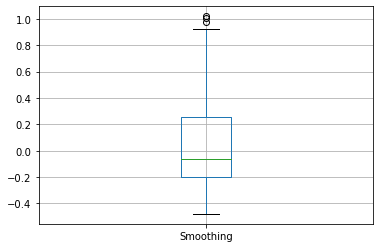

In [8]:
ndf[['Smoothing']].boxplot()

In [9]:
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature

## We are going to import the necessary libraries and load the GISTEMP dataset


The GISS Surface Temperature Analysis ver. 4 (GISTEMP v4) is an estimate of global surface temperature change. Graphs and tables are updated around the middle of every month using current data files from NOAA GHCN v4 (meteorological stations) and ERSST v5 (ocean areas), combined as described in our publications Hansen et al. (2010) and Lenssen et al. (2019). These updated files incorporate reports for the previous month and also late reports and corrections for earlier months

In [22]:
import xarray as xr
import warnings
warnings.simplefilter("ignore")

In [11]:
xr_df = xr.open_dataset('gistemp1200_GHCNv4_ERSSTv5.nc')
xr_df #loading the dataset

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1712, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2022-08-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2022-09-12 12:19:48 by SBBX_to_nc 2.0 - ILAND=1200,...

In [26]:
df = xr_df.to_dataframe()
df

time_bnds  tempanomaly
lat   lon    time       nv                        
-89.0 -179.0 1880-01-15 0  1880-01-01          NaN
                        1  1880-02-01          NaN
             1880-02-15 0  1880-02-01          NaN
                        1  1880-03-01          NaN
             1880-03-15 0  1880-03-01          NaN
...                               ...          ...
 89.0  179.0 2022-06-15 1  2022-07-01         0.74
             2022-07-15 0  2022-07-01         0.41
                        1  2022-08-01         0.41
             2022-08-15 0  2022-08-01         0.44
                        1  2022-09-01         0.44

[55468800 rows x 2 columns]

In [39]:
df.time_bnds

lat    lon     time        nv
-89.0  -179.0  1880-01-15  0    1880-01-01
                           1    1880-02-01
               1880-02-15  0    1880-02-01
                           1    1880-03-01
               1880-03-15  0    1880-03-01
                                   ...    
 89.0   179.0  2022-06-15  1    2022-07-01
               2022-07-15  0    2022-07-01
                           1    2022-08-01
               2022-08-15  0    2022-08-01
                           1    2022-09-01
Name: time_bnds, Length: 55468800, dtype: datetime64[ns]

In [40]:
df.tempanomaly

lat    lon     time        nv
-89.0  -179.0  1880-01-15  0      NaN
                           1      NaN
               1880-02-15  0      NaN
                           1      NaN
               1880-03-15  0      NaN
                                 ... 
 89.0   179.0  2022-06-15  1     0.74
               2022-07-15  0     0.41
                           1     0.41
               2022-08-15  0     0.44
                           1     0.44
Name: tempanomaly, Length: 55468800, dtype: float32

### The dataset is a 2°×2° grid of temperature anomalies, on a monthly frequency

In [12]:
ab = pd.DataFrame(xr_df['time_bnds'],columns=['Open','Close'])
print(ab)

           Open      Close
0    1880-01-01 1880-02-01
1    1880-02-01 1880-03-01
2    1880-03-01 1880-04-01
3    1880-04-01 1880-05-01
4    1880-05-01 1880-06-01
...         ...        ...
1707 2022-04-01 2022-05-01
1708 2022-05-01 2022-06-01
1709 2022-06-01 2022-07-01
1710 2022-07-01 2022-08-01
1711 2022-08-01 2022-09-01

[1712 rows x 2 columns]


In [13]:
print(ab.isnull().count())
print('\n******* Null Values *******\n')

## Here is null values in the ab dataframe

Open     1712
Close    1712
dtype: int64

******* Null Values *******



<AxesSubplot:>

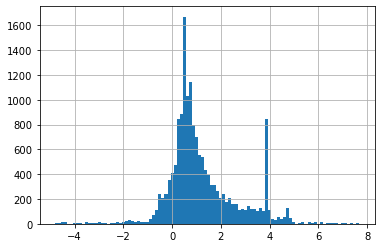

In [14]:
df = xr_df['tempanomaly'].values[-1]
pd.Series(df.ravel()).hist(bins = 100)  #Simple histogram for one of the month

In [15]:
xr_df['tempanomaly'][-71][1]

<xarray.DataArray 'tempanomaly' (lon: 180)>
array([0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22],
      dtype=float32)
Coordinates:
    lat      float32 -87.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
    time     datetime64[ns] 2016-10-15
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [16]:
## Resampling the monthly data to yearly data


climate = xr_df.resample(time='Y').mean()
anomaly = climate['tempanomaly']

<AxesSubplot:>

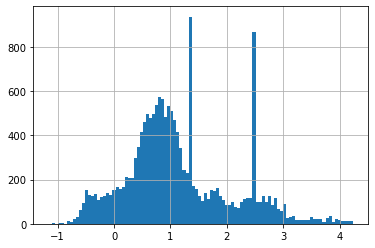

In [17]:
df = climate['tempanomaly'].values[-1]
pd.Series(df.ravel()).hist(bins = 100)

<xarray.Dataset>
Dimensions:      (time: 16, lat: 90, lon: 180)
Coordinates:
  * time         (time) datetime64[ns] 1880-12-31 1890-12-31 ... 2030-12-31
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
Data variables:
    tempanomaly  (time, lat, lon) float32 nan nan nan nan ... 3.221 3.221 3.221


<AxesSubplot:>

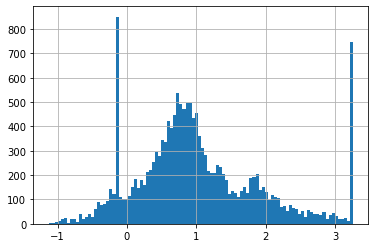

In [18]:
dclimate = xr_df.resample(time='10Y').mean() ##Again resampling the data to decades so 
d_anomaly = climate['tempanomaly']

print(dclimate)


df = dclimate['tempanomaly'].values[-1]
pd.Series(df.ravel()).hist(bins = 100) ## Plot of temperature anomaly of the last decade

In [19]:
date =  pd.to_datetime(d_anomaly.isel(time=1)['time'].values)
date

Timestamp('1881-12-31 00:00:00')

+++++++++++   1th Decade  ++++++++++
[nan nan nan ... nan nan nan]


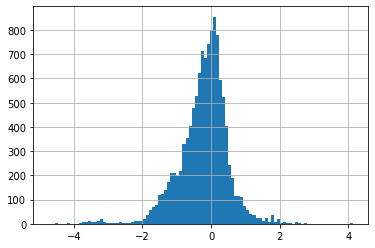

+++++++++++   2th Decade  ++++++++++
[nan nan nan ... nan nan nan]


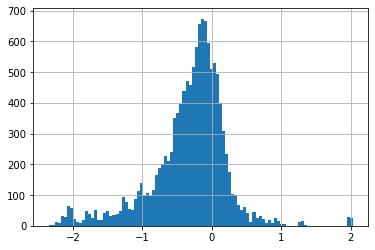

+++++++++++   3th Decade  ++++++++++
[nan nan nan ... nan nan nan]


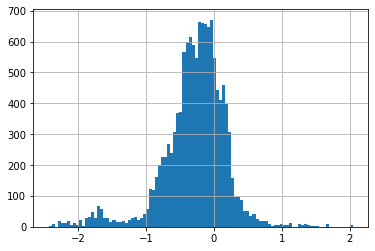

+++++++++++   4th Decade  ++++++++++
[nan nan nan ... nan nan nan]


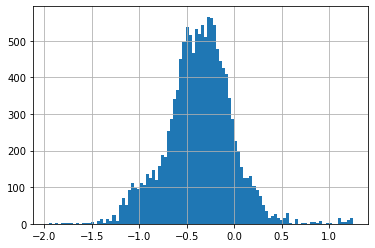

+++++++++++   5th Decade  ++++++++++
[nan nan nan ... nan nan nan]


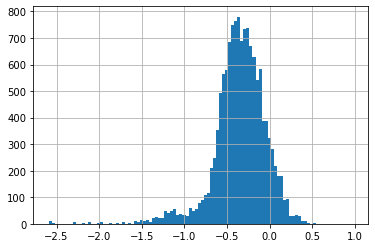

+++++++++++   6th Decade  ++++++++++
[      nan       nan       nan ... 0.7066667 0.7066667 0.7066667]


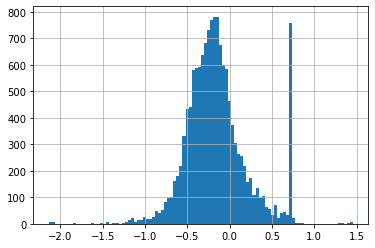

+++++++++++   7th Decade  ++++++++++
[      nan       nan       nan ... 1.2928714 1.2928714 1.2928714]


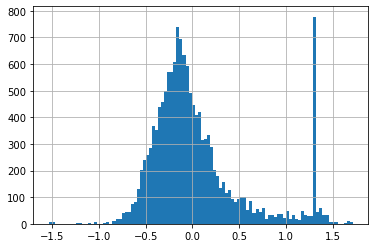

+++++++++++   8th Decade  ++++++++++
[      nan       nan       nan ... 0.7080848 0.7080848 0.7080848]


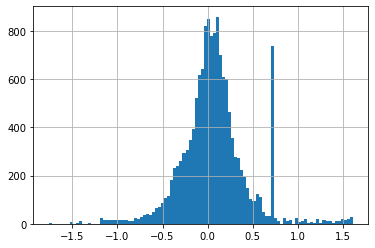

+++++++++++   9th Decade  ++++++++++
[0.06553192 0.06553192 0.06553192 ... 0.67233336 0.67233336 0.67233336]


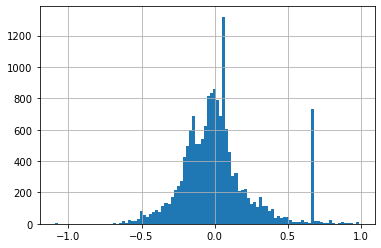

+++++++++++   10th Decade  ++++++++++
[-0.1445378  -0.1445378  -0.1445378  ... -0.43633333 -0.43633333
 -0.43633333]


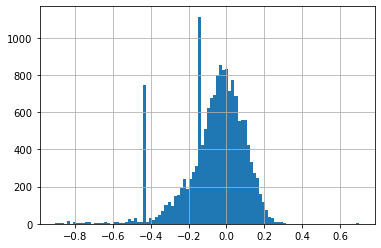

+++++++++++   11th Decade  ++++++++++
[ 0.11925001  0.11925001  0.11925001 ... -0.2365834  -0.2365834
 -0.2365834 ]


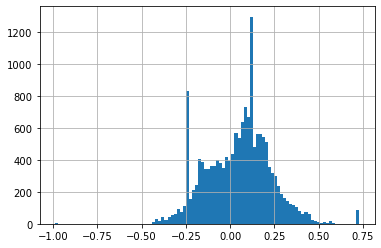

+++++++++++   12th Decade  ++++++++++
[-0.16400003 -0.16400003 -0.16400003 ...  0.08066666  0.08066666
  0.08066666]


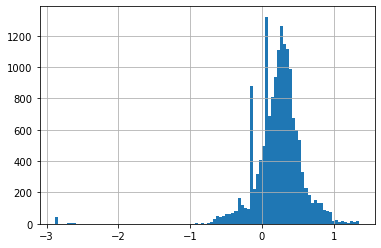

+++++++++++   13th Decade  ++++++++++
[-0.19133334 -0.19133334 -0.19133334 ...  0.5710833   0.5710833
  0.5710833 ]


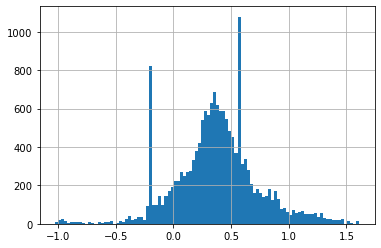

+++++++++++   14th Decade  ++++++++++
[0.14358333 0.14358333 0.14358333 ... 1.8296667  1.8296667  1.8296667 ]


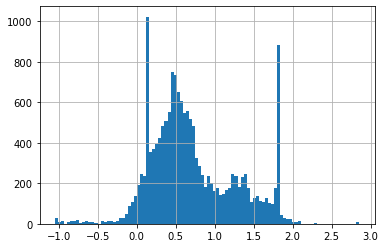

+++++++++++   15th Decade  ++++++++++
[0.6110834 0.6110834 0.6110834 ... 3.3005006 3.3005006 3.3005006]


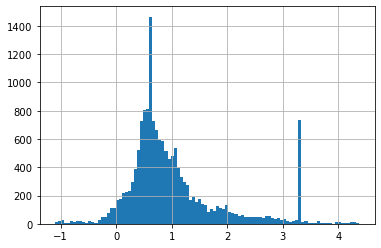

+++++++++++   16th Decade  ++++++++++
[-0.12850001 -0.12850001 -0.12850001 ...  3.221       3.221
  3.221     ]


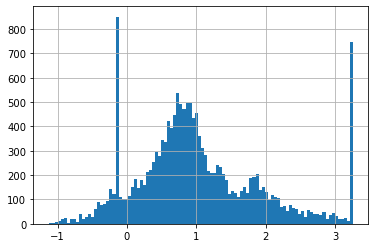

In [20]:
for i, j in enumerate(dclimate['tempanomaly'].values):
    print("+++++++++++   "+str(i+1)+"th Decade  ++++++++++")
    print(j.ravel())
    plt.hist(j.ravel(), bins = 100)
    plt.grid()
    plt.show() # One can easily see the shift of mean anomaly temperature from 0 to 1

### One can observe the mean shift of the data with increase in outliers in above plots

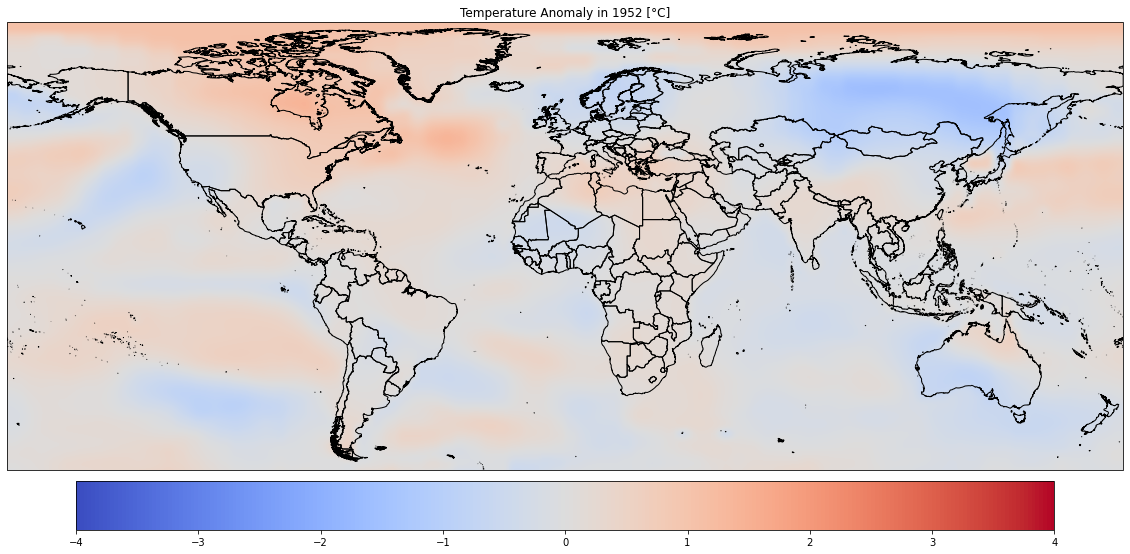

In [20]:
## Plotting the data on map

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'), facecolor='none', edgecolor='black')
ax.set_extent([-150, 150, -55, 85])

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}


i = -71  # Index of the time list in xr_df

date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)

ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")


anomaly.isel(time=i).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='coolwarm',
                cbar_kwargs = cbar_kwargs, interpolation='bicubic')
plt.savefig("global_map.png", bbox_inches='tight', dpi=150)
plt.show()

In [21]:
from matplotlib.animation import FuncAnimation

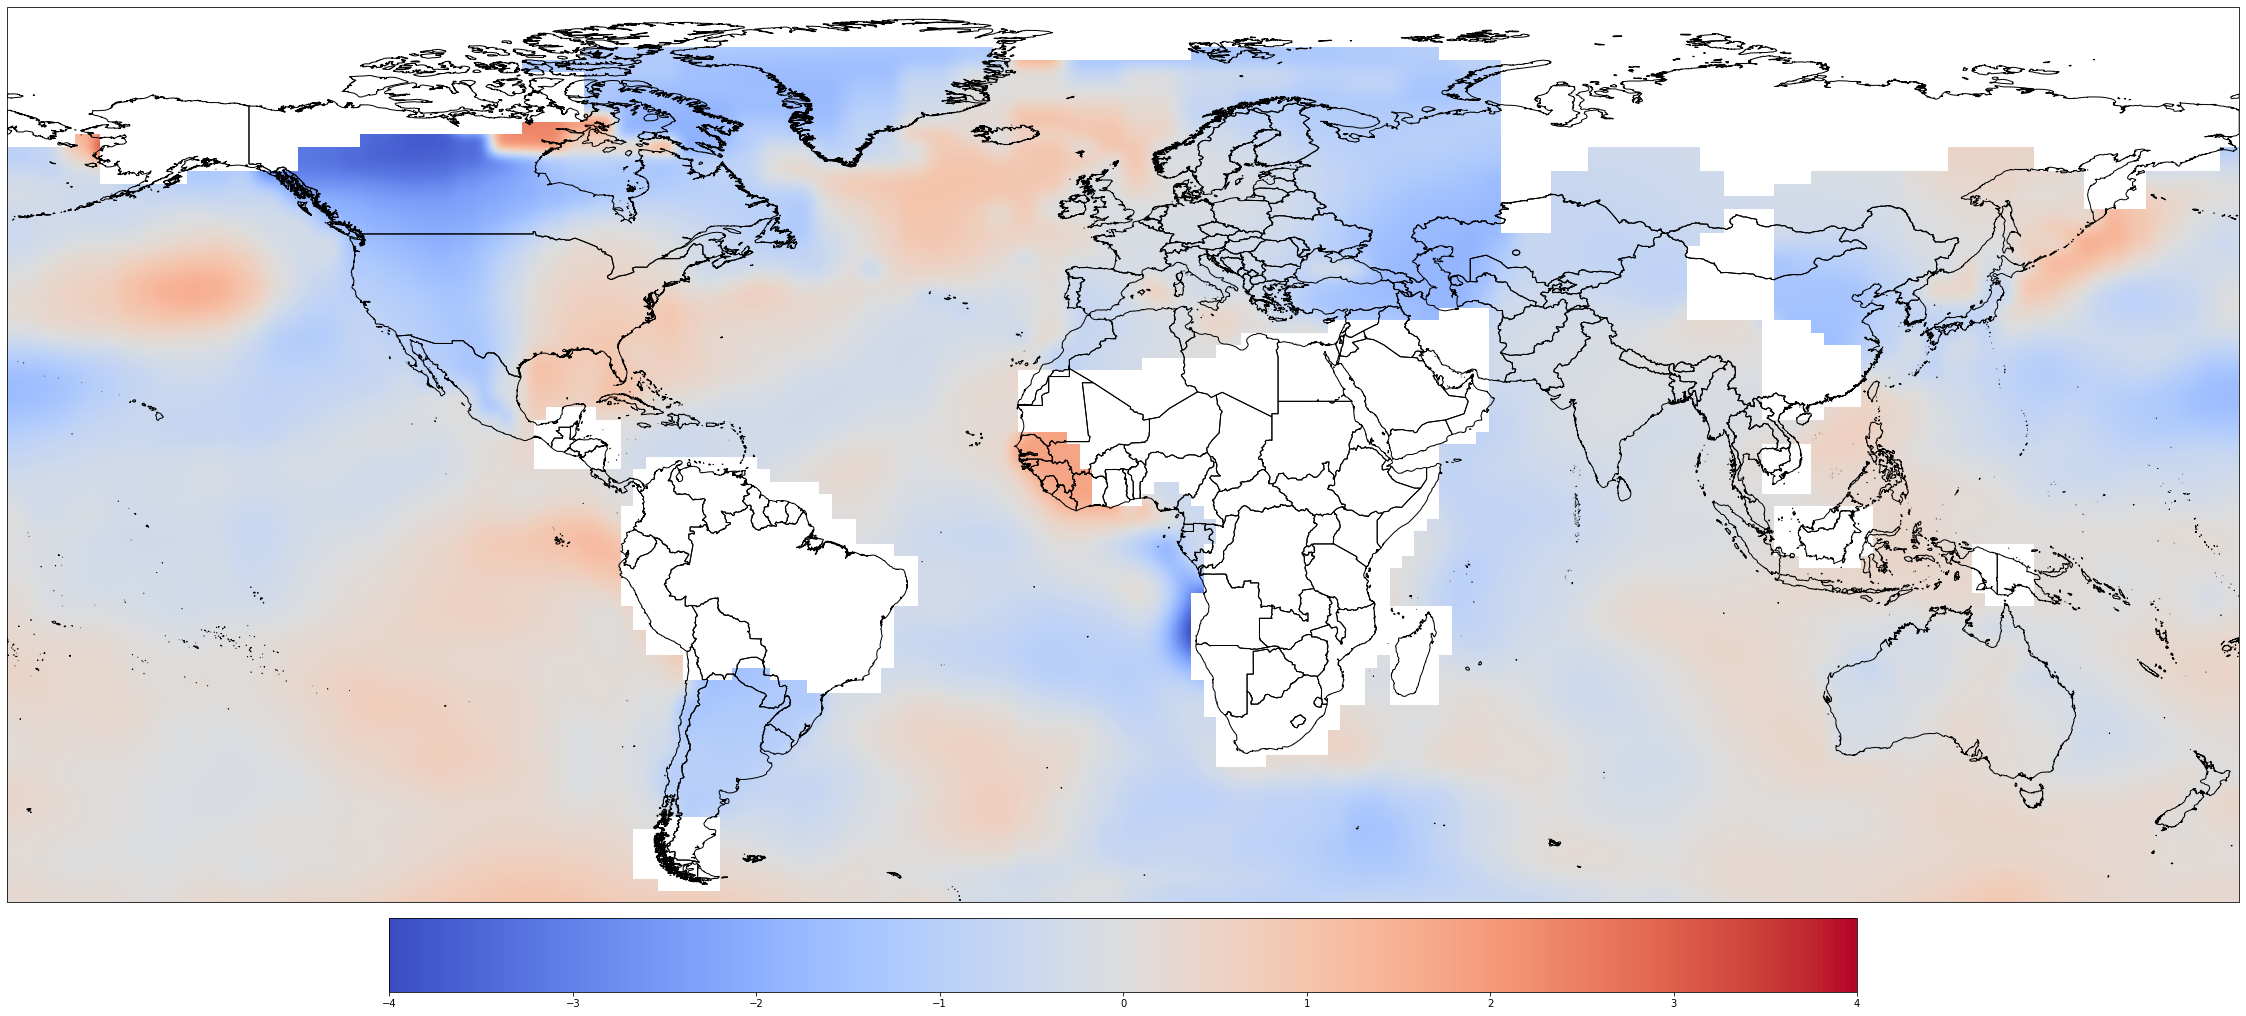

In [22]:
## Creating a small animation of the data

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'), facecolor='none', edgecolor='black')
ax.set_extent([-150, 150, -55, 85])

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}

image = anomaly.isel(time=0).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='coolwarm',
                cbar_kwargs = cbar_kwargs, interpolation='bicubic')

i = -1

def animate(i):
    date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)

    ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
    
    ax.title.set_fontsize(30)


    image.set_array(anomaly.isel(time=i))

    return image

In [23]:
ani= FuncAnimation(fig, animate, frames = 143, interval=500, repeat = False)
plt.show()

In [24]:
ani.save("animation.mp4")

In [25]:

frames = anomaly['time'].values[:]

In [26]:
len(frames)

143